In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import tensorflow as tf
import math

from IPython.display import clear_output, display
from sklearn import preprocessing

In [2]:
#Download the dataframe and saving it
raw = yf.download('IYW', period = 'max')
df = pd.DataFrame(raw.copy())
last_date = df.iloc[-1].name
clear_output()

In [3]:
class myData:
    import numpy as np

    def __init__(self, array, days, scaler):
        self.array = array
        self.days = days
        self.scaler = scaler

        self.y_original = self.scaler.inverse_transform(self.array)

        self.x, self.y = [], []
        
        for i in range(days,len(array)):
            self.x.append(array[i - days:i])
            self.y.append(array[i])
        
        self.x, self.y = np.reshape(numpy_arr := np.array(self.x), (numpy_arr.shape[0], numpy_arr.shape[1], 1)), np.array(self.y)


In [4]:
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(df.filter(['Close']).values)
train_len = math.floor(len(scaled_data) * 0.90)
len(scaled_data), train_len

(5885, 5296)

In [5]:
mTrain: myData = myData(scaled_data[0:train_len], 30, scaler = scaler)
mTest: myData = myData(scaled_data[train_len:], 30, scaler = scaler)

In [6]:
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(mTrain.x.shape[1], 1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False))
model.add(tf.keras.layers.Dense(25, activation=tf.keras.activations.sigmoid))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy', 'mse'])

In [7]:
history = model.fit(mTrain.x, mTrain.y, batch_size = 32, epochs = 30, validation_split = 0.2)

Epoch 1/30
132/132 [==============================] - 3s 15ms/step - loss: 0.0990 - accuracy: 2.3742e-04 - mse: 0.0990 - val_loss: 0.0631 - val_accuracy: 0.0000e+00 - val_mse: 0.0631
Epoch 2/30
132/132 [==============================] - 2s 12ms/step - loss: 2.0143e-04 - accuracy: 2.3742e-04 - mse: 2.0143e-04 - val_loss: 0.0342 - val_accuracy: 0.0000e+00 - val_mse: 0.0342
Epoch 3/30
132/132 [==============================] - 1s 11ms/step - loss: 1.0155e-04 - accuracy: 2.3742e-04 - mse: 1.0155e-04 - val_loss: 0.0300 - val_accuracy: 0.0000e+00 - val_mse: 0.0300
Epoch 4/30
132/132 [==============================] - 1s 11ms/step - loss: 9.3373e-05 - accuracy: 2.3742e-04 - mse: 9.3373e-05 - val_loss: 0.0279 - val_accuracy: 0.0000e+00 - val_mse: 0.0279
Epoch 5/30
132/132 [==============================] - 1s 11ms/step - loss: 8.2452e-05 - accuracy: 2.3742e-04 - mse: 8.2452e-05 - val_loss: 0.0244 - val_accuracy: 0.0000e+00 - val_mse: 0.0244
Epoch 6/30
132/132 [==============================] -

In [8]:
predictions = model.predict(mTest.x)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 0s 3ms/step


In [9]:
train_chart = df.filter(['Close'])[:-predictions.size]
test_chart = df.filter(['Close'])[-predictions.size:]
test_chart['Predictions'] = predictions

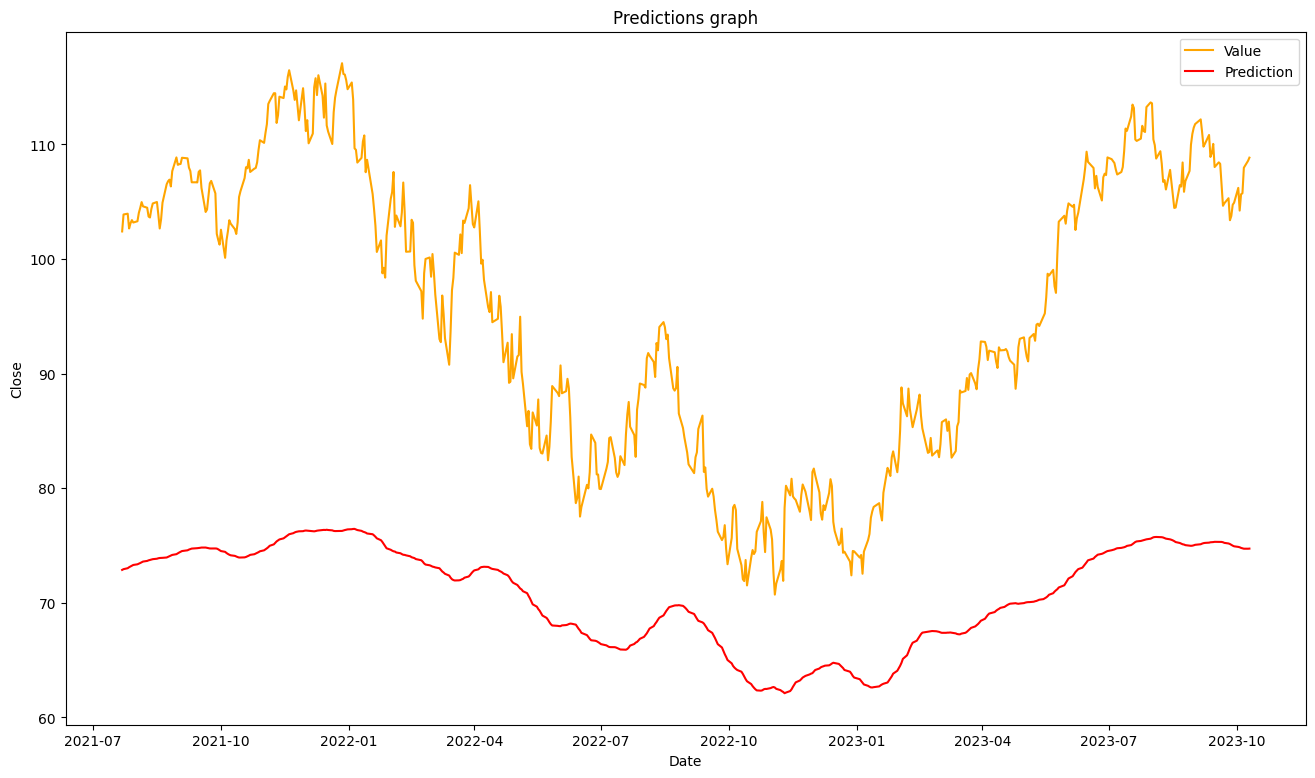

In [10]:
plt.figure(figsize=(16,9))
plt.title('Predictions graph')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(test_chart['Close'], c = 'orange')
plt.plot(test_chart['Predictions'], c = 'red')
plt.legend(['Value', 'Prediction'])
plt.show()

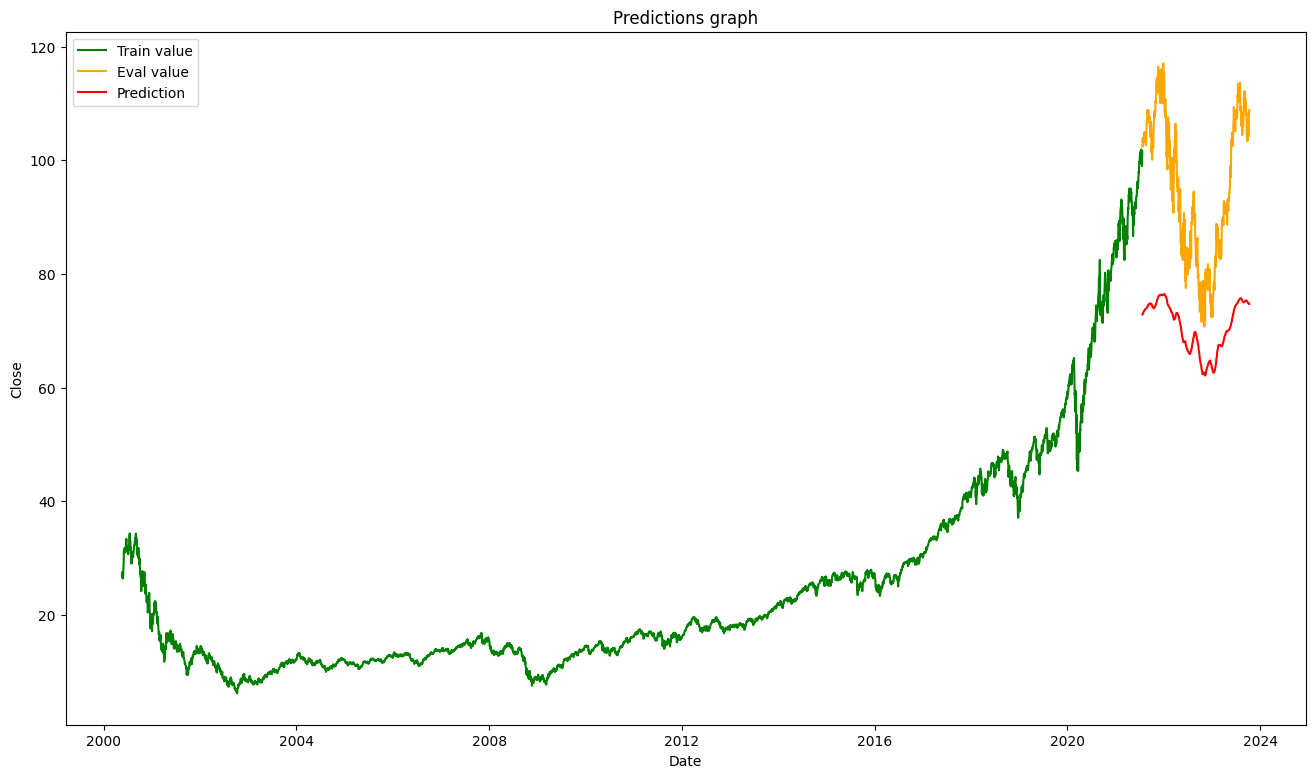

In [11]:
plt.figure(figsize=(16,9))
plt.title('Predictions graph')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train_chart['Close'], c = 'green')
plt.plot(test_chart['Close'], c = 'orange')
plt.plot(test_chart['Predictions'], c = 'red')
plt.legend(['Train value', 'Eval value', 'Prediction'])
x = plt.show()

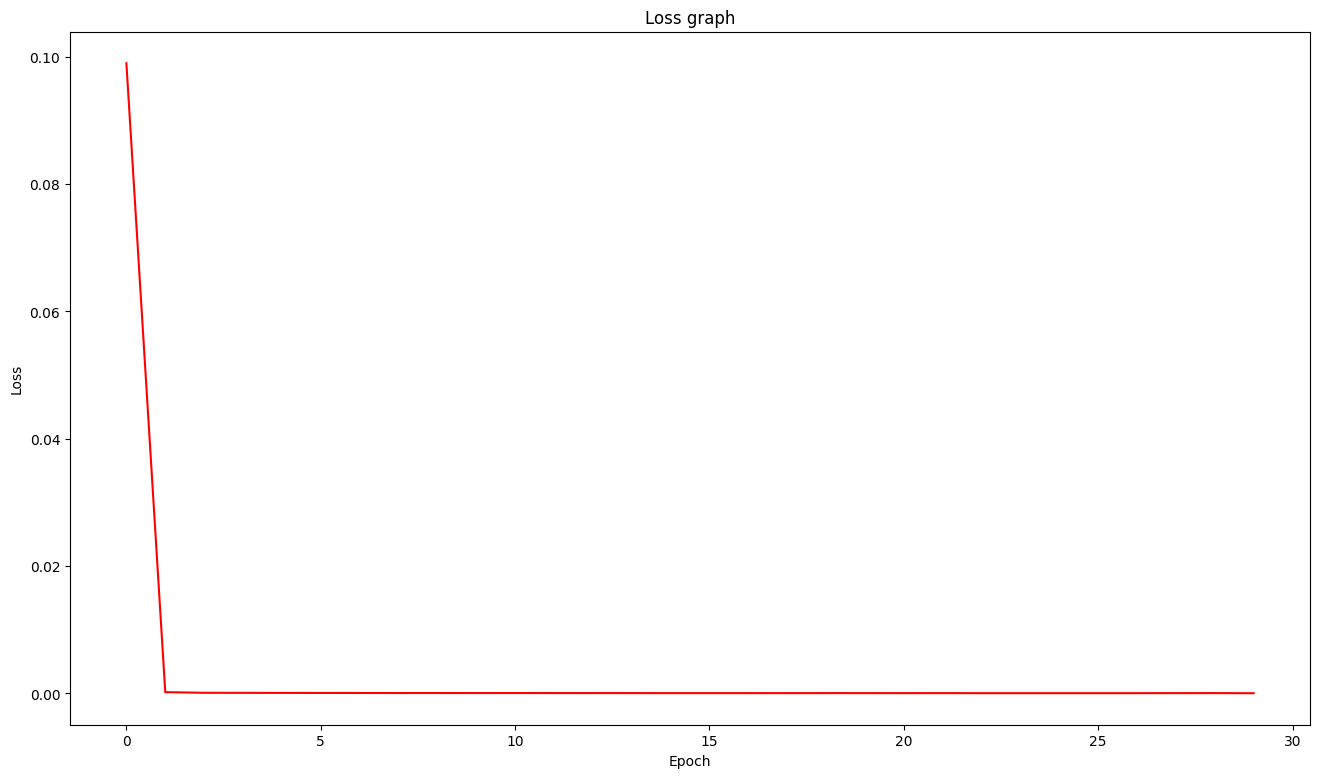

In [12]:
plt.figure(figsize=(16,9))
plt.title('Loss graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['mse'], c = 'red')
plt.show()

Predicting next 365 days

In [13]:
#MODEL 2:
m2Train: myData = myData(scaled_data[:], 30, scaler = scaler)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(m2Train.x.shape[1], 1)))
model2.add(tf.keras.layers.LSTM(64, return_sequences=False))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(1))

model2.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy', 'mse'])
model2.fit(m2Train.x, m2Train.y, batch_size = 32, epochs = 30, validation_split = 0.05)

Epoch 1/30
174/174 [==============================] - 4s 15ms/step - loss: 0.0026 - accuracy: 3.5958e-04 - mse: 0.0026 - val_loss: 8.8257e-04 - val_accuracy: 0.0000e+00 - val_mse: 8.8257e-04
Epoch 2/30
174/174 [==============================] - 2s 13ms/step - loss: 1.5756e-04 - accuracy: 3.5958e-04 - mse: 1.5756e-04 - val_loss: 8.8602e-04 - val_accuracy: 0.0000e+00 - val_mse: 8.8602e-04
Epoch 3/30
174/174 [==============================] - 2s 14ms/step - loss: 1.5942e-04 - accuracy: 3.5958e-04 - mse: 1.5942e-04 - val_loss: 9.9711e-04 - val_accuracy: 0.0000e+00 - val_mse: 9.9711e-04
Epoch 4/30
174/174 [==============================] - 2s 14ms/step - loss: 1.5018e-04 - accuracy: 3.5958e-04 - mse: 1.5018e-04 - val_loss: 7.0612e-04 - val_accuracy: 0.0000e+00 - val_mse: 7.0612e-04
Epoch 5/30
174/174 [==============================] - 2s 14ms/step - loss: 1.3703e-04 - accuracy: 3.5958e-04 - mse: 1.3703e-04 - val_loss: 6.7762e-04 - val_accuracy: 0.0000e+00 - val_mse: 6.7762e-04
Epoch 6/30
17

In [14]:
d_time = dt.timedelta(days = 1)
start_prediction_time = last_date + d_time

one_year_future_d = []
one_year_future_val = []
last_30 = []
last_30 = df.filter(['Close']).values[-30:]
last_30 = scaler.transform(last_30)

for i in range(0,365):
    one_year_future_d.append(start_prediction_time + d_time * i)

for i in range(0,365):
    last_30 = last_30[-30:]
    last_30 = np.reshape(last_30,(1,-1,1))
    future_predict = model2.predict(last_30)
    last_30 = np.reshape(last_30, -1)
    last_30 = [i for i in last_30]
    last_30.append(future_predict[0][0])
    one_year_future_val.append(future_predict[0][0])

one_year_future_val = np.reshape(one_year_future_val,(-1,1))
one_year_future_val = scaler.inverse_transform(one_year_future_val)
one_year_future_val = [x[0] for x in one_year_future_val]
future_df = pd.DataFrame({'Date': one_year_future_d, 'Prediction': one_year_future_val})
clear_output()

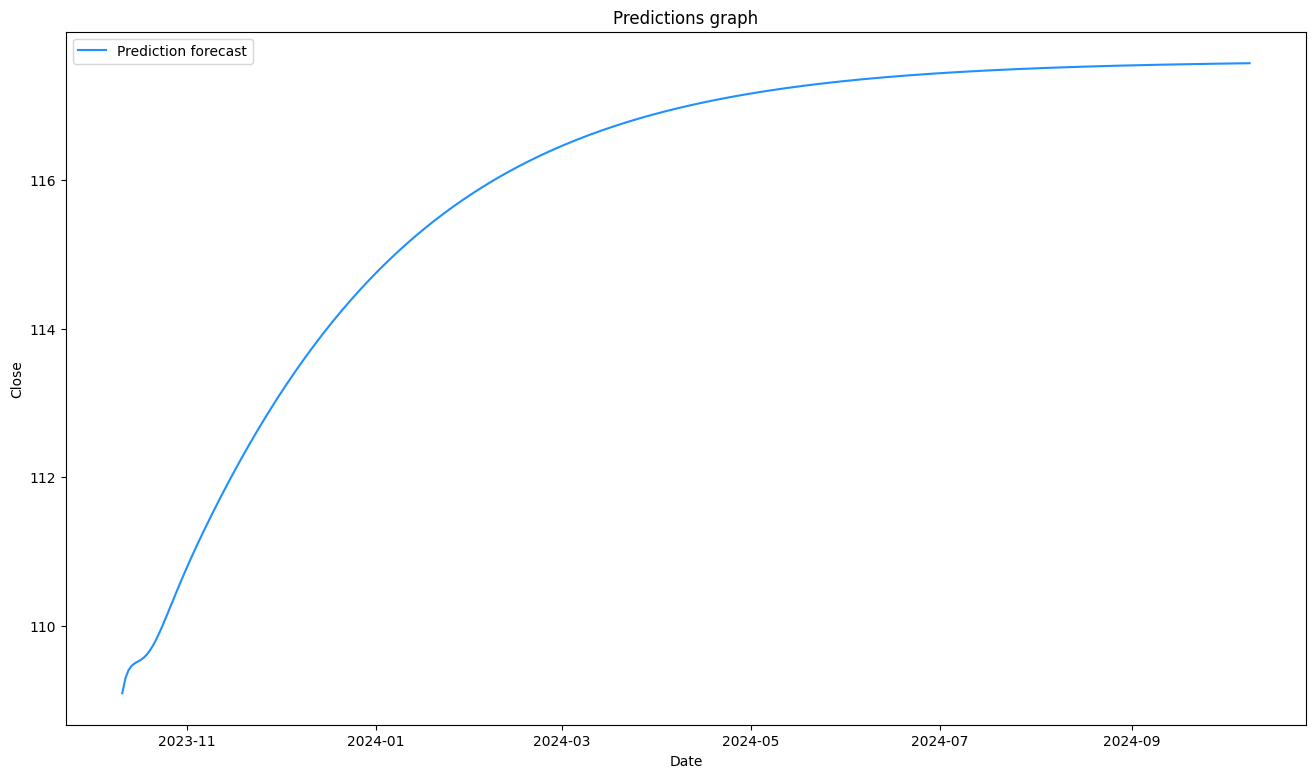

In [15]:
plt.figure(figsize=(16,9))
plt.title('Predictions graph')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(future_df['Date'], future_df['Prediction'], c = 'dodgerblue')
plt.legend(['Prediction forecast'])
plt.show()

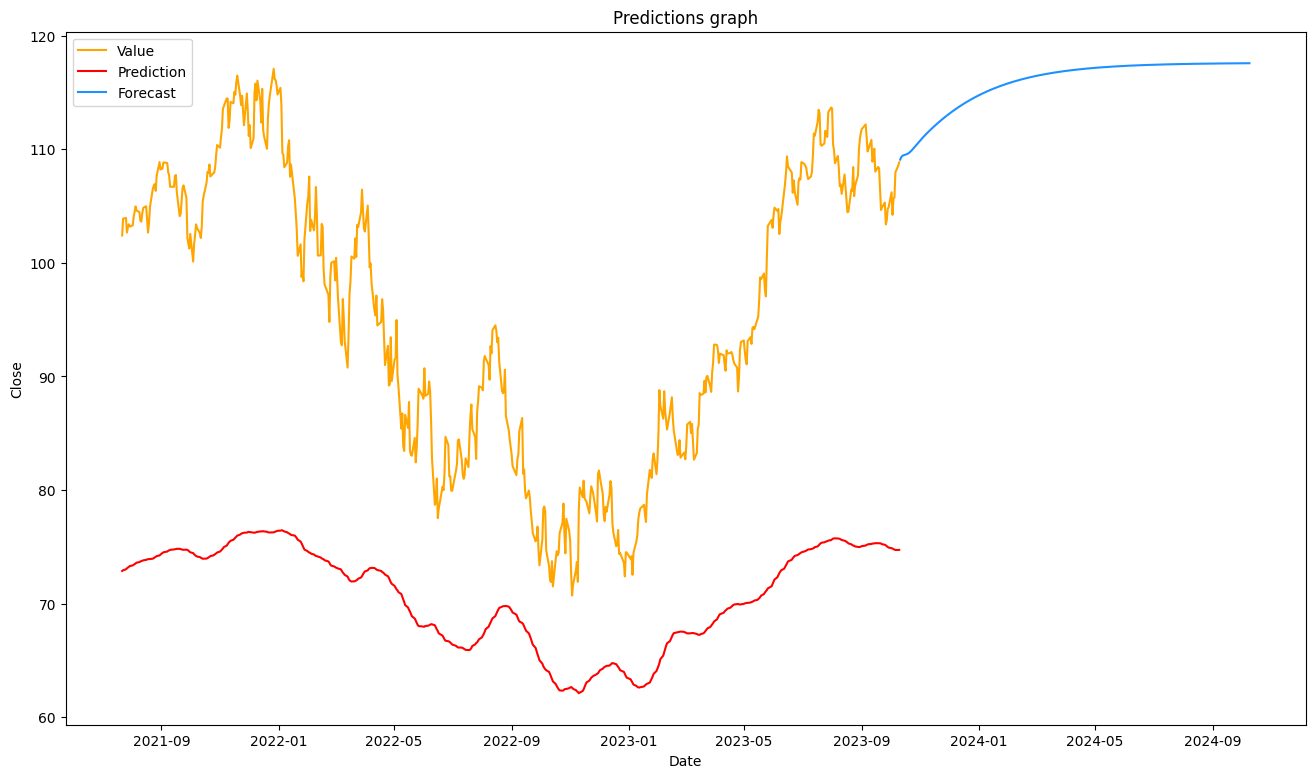

In [16]:
plt.figure(figsize=(16,9))
plt.title('Predictions graph')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(test_chart['Close'], c = 'orange')
plt.plot(test_chart['Predictions'], c = 'red')
plt.plot(future_df['Date'], future_df['Prediction'], c = 'dodgerblue')
plt.legend(['Value', 'Prediction', 'Forecast'])
plt.show()

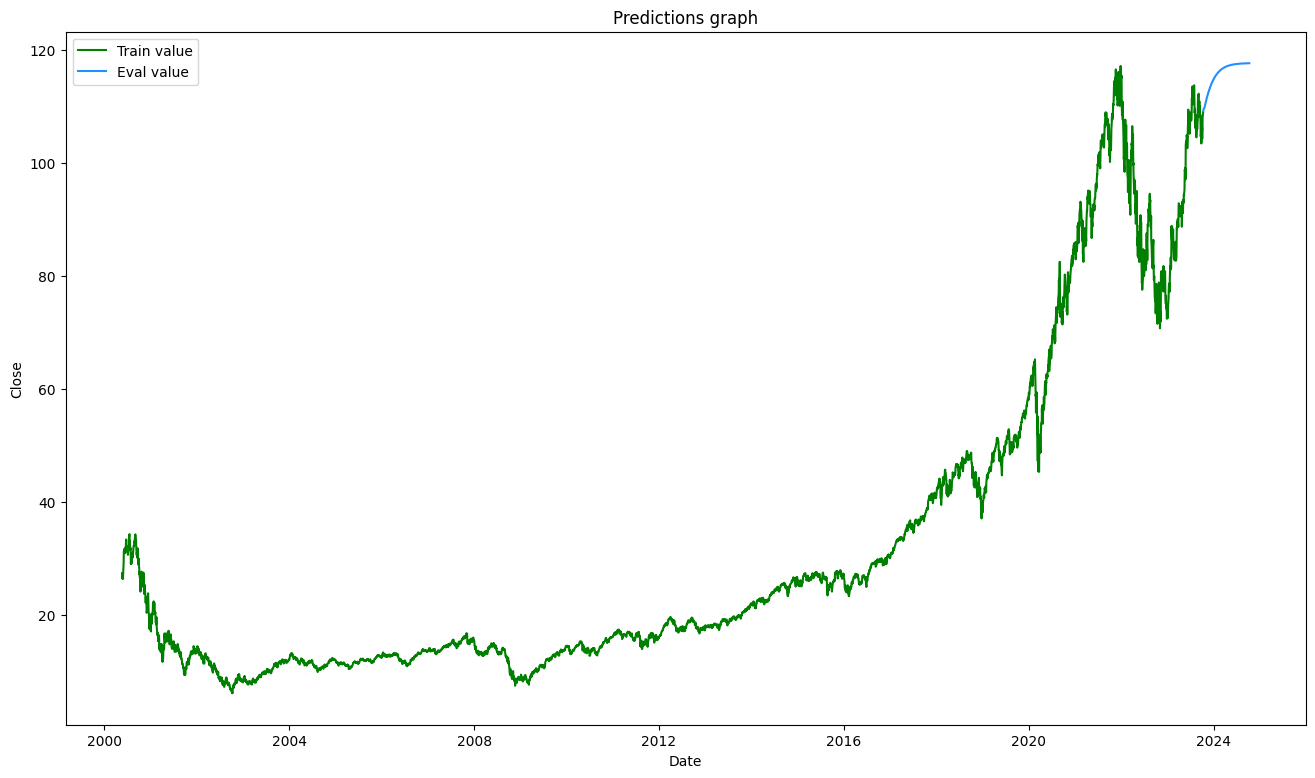

In [17]:
plt.figure(figsize=(16,9))
plt.title('Predictions graph')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df['Close'], c = 'green')
plt.plot(future_df['Date'], future_df['Prediction'], c = 'dodgerblue')
plt.legend(['Train value', 'Eval value', 'Prediction'])
plt.show()

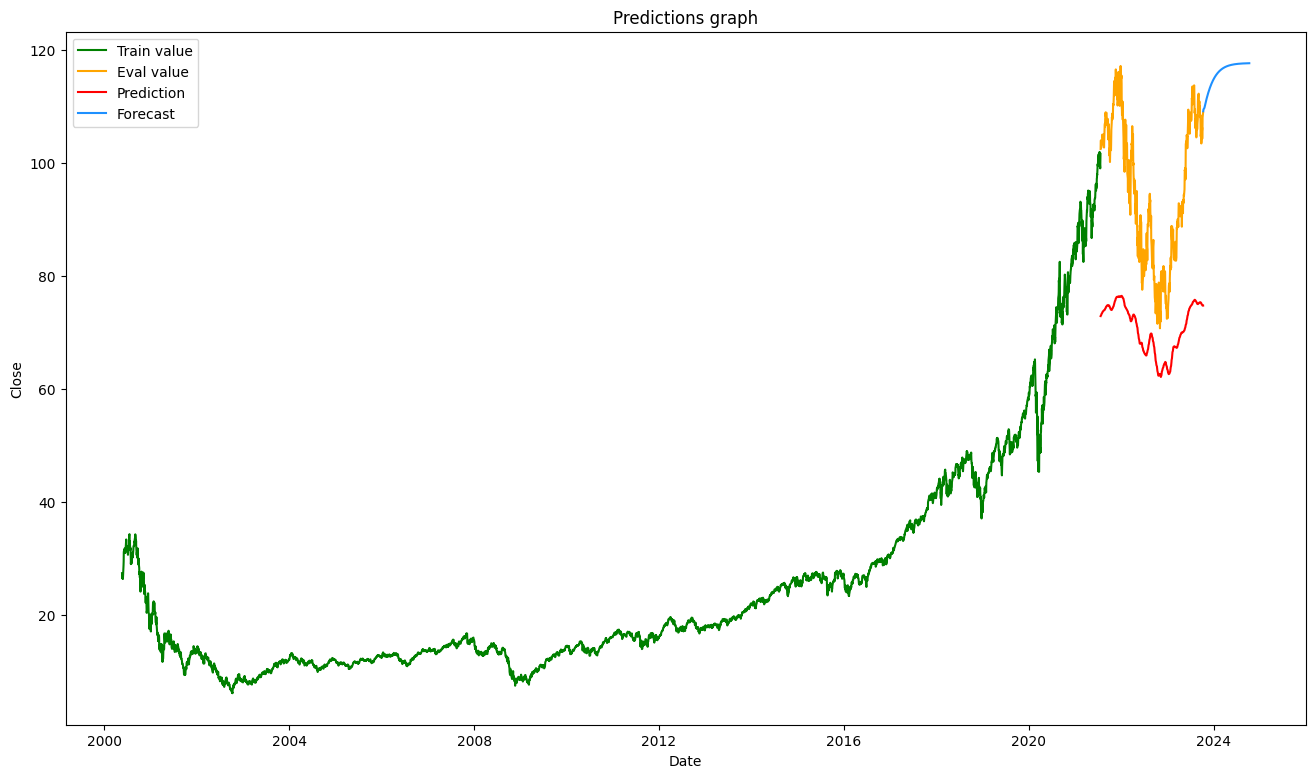

In [18]:
plt.figure(figsize=(16,9))
plt.title('Predictions graph')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train_chart['Close'], c = 'green')
plt.plot(test_chart['Close'], c = 'orange')
plt.plot(test_chart['Predictions'], c = 'red')
plt.plot(future_df['Date'], future_df['Prediction'], c = 'dodgerblue')

plt.legend(['Train value', 'Eval value', 'Prediction', 'Forecast'])
x = plt.show()

In [19]:
future_df.index = future_df.index+1
future_df.to_csv('2023.07.01-2024.06.29-predictions.csv')
model.save('history-predictor')
model2.save('future-predictor')

INFO:tensorflow:Assets written to: history-predictor/assets


INFO:tensorflow:Assets written to: history-predictor/assets


INFO:tensorflow:Assets written to: future-predictor/assets


INFO:tensorflow:Assets written to: future-predictor/assets


In [20]:
future_df.head(30)

,Date,Prediction
1,2023-10-11,109.089226
2,2023-10-12,109.288010
3,2023-10-13,109.397095
4,2023-10-14,109.457397
5,2023-10-15,109.491142
6,2023-10-16,109.514389
7,2023-10-17,109.538338
8,2023-10-18,109.570091
9,2023-10-19,109.613380
10,2023-10-20,109.669426
